In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

#### Reading in Data

In [4]:
df = pd.read_csv("archive/data.csv")
df_artist = pd.read_csv("archive/data_by_artist.csv")
df_genres = pd.read_csv("archive/data_by_genres.csv")
df_year = pd.read_csv("archive/data_by_year.csv")
df_w_genres = pd.read_csv("archive/data_w_genres.csv")

In [5]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [6]:
df_artist.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9


In [7]:
df_genres.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0


In [8]:
df_year.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1921,0.895823,0.425661,229911.914062,0.236784,0.322330,0.215814,-17.095437,0.077258,100.397758,0.425495,0.351562,7,1
1,1922,0.939236,0.480000,167904.541667,0.237026,0.440470,0.238647,-19.179958,0.115419,101.376139,0.534056,0.138889,10,1
2,1923,0.976329,0.568462,178356.301775,0.246936,0.401932,0.236656,-14.373882,0.098619,112.456598,0.624788,5.727811,0,1
3,1924,0.935575,0.548654,188461.649789,0.347033,0.583955,0.237875,-14.202304,0.090210,120.653359,0.668574,0.603376,10,1
4,1925,0.965422,0.571890,184130.699620,0.264373,0.408893,0.243094,-14.516707,0.115457,115.671715,0.616430,2.707224,5,1


In [9]:
df_w_genres.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[]


### EDA

First, I notice that the different datasets are different aggregations of the original, with different key ids. The first being by song, the second by artist, the third by genre, the fourth by year, and the fifth is by arists with genre. The data at the song level is probably the most useful for our purposes.

Since we are looking at learning genres through unsupervised learning it would be good to take a look at what kind of genres Spotify uses

In [10]:
genres = df_genres["genres"].unique()
len(genres)

2664

How many null values in the main dataframe?

In [11]:
df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [12]:
df_artist.isna().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
dtype: int64

In [13]:
df_genres.isna().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64

In [14]:
df_w_genres.isna().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
genres              0
dtype: int64

In [15]:
df_year.isna().sum()

year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64

No null values that is good to know

Seeing the top 25 artists and their popularity

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

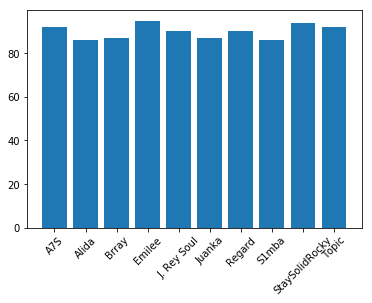

In [16]:
top10_artists = df_artist.sort_values("popularity", ascending = False).head(10)
artist = top10_artists["artists"]
artists_pop = top10_artists["popularity"]
plt.bar(artist, artists_pop)
plt.xticks(rotation= 45)

These artists all have very fwe counts indicating that their popularity score could be inflated from a single song or two.

In [17]:
#top10_artists[["artists", "popularity"]]
top10_artists

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
7176,Emilee,0.0686,0.674,176547.0,0.774,0.001880,0.3930,-7.567,0.0892,112.050,0.330,95.0,11,0,2
22417,StaySolidRocky,0.7490,0.728,147800.0,0.431,0.000000,0.0996,-9.966,0.0622,130.022,0.629,94.0,6,0,2
216,A7S,0.2230,0.789,166794.0,0.720,0.000000,0.1290,-5.652,0.2180,122.031,0.664,92.0,8,0,2
25318,Topic,0.2230,0.789,166794.0,0.720,0.000000,0.1290,-5.652,0.2180,122.031,0.664,92.0,8,0,1
19891,Regard,0.1770,0.880,157606.0,0.751,0.000064,0.1060,-4.258,0.0874,117.948,0.884,90.0,7,0,2
10612,J. Rey Soul,0.1930,0.894,249143.0,0.635,0.001050,0.0823,-6.929,0.0473,105.013,0.428,90.0,2,1,2
12348,Juanka,0.3000,0.815,345241.0,0.715,0.000005,0.0910,-4.650,0.2070,176.007,0.786,87.0,4,0,2
3353,Brray,0.3000,0.815,345241.0,0.715,0.000005,0.0910,-4.650,0.2070,176.007,0.786,87.0,4,0,1
830,Alida,0.1770,0.570,208222.0,0.672,0.000000,0.0768,-5.890,0.0723,120.019,0.448,86.0,8,0,2
20897,S1mba,0.4960,0.613,167917.0,0.624,0.000000,0.2830,-6.660,0.2060,62.948,0.804,86.0,11,0,1


I have no idea who any of these artists are

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

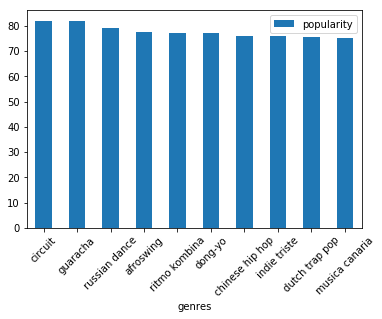

In [18]:
top10_genre = df_genres.sort_values("popularity", ascending = False).head(10)
genre = top10_genre["genres"]
genre_pop = top10_genre["popularity"]
top10_genre.plot.bar("genres", "popularity")
plt.xticks(rotation= 45)


In [19]:
top10_genre

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
512,circuit,0.009030,0.745000,189818.000000,0.972000,0.465000,0.297000,-3.506000,0.077400,128.031000,0.556000,82.000000,7,1
1118,guaracha,0.009030,0.745000,189818.000000,0.972000,0.465000,0.297000,-3.506000,0.077400,128.031000,0.556000,82.000000,7,1
2141,russian dance,0.005610,0.653000,198095.000000,0.945000,0.915000,0.439000,-2.634000,0.096000,126.093000,0.326000,79.000000,5,1
34,afroswing,0.367658,0.697292,186504.958333,0.564667,0.000180,0.210796,-7.439500,0.180471,79.759917,0.701125,77.625000,11,0
2104,ritmo kombina,0.251333,0.845000,172747.333333,0.578333,0.000040,0.069533,-5.927667,0.111667,132.154000,0.505333,77.333333,2,0
806,dong-yo,0.259000,0.829000,80927.000000,0.886000,0.000000,0.055900,-1.746000,0.112000,115.056000,0.777000,77.000000,8,1
478,chinese hip hop,0.359000,0.409000,280842.000000,0.678000,0.000005,0.167000,-7.731000,0.087800,89.968000,0.168000,76.000000,9,1
1240,indie triste,0.946000,0.830000,207400.000000,0.159000,0.000020,0.362000,-14.461000,0.038300,104.950000,0.189000,76.000000,1,1
850,dutch trap pop,0.103223,0.813800,163410.666667,0.707267,0.005968,0.216907,-4.437133,0.162133,104.826800,0.613867,75.466667,8,0
1677,musica canaria,0.491167,0.785167,187229.166667,0.625500,0.002167,0.075667,-5.258667,0.105983,107.362167,0.675667,75.333333,6,1


A bit unsure why this dataset is so different from my expectations

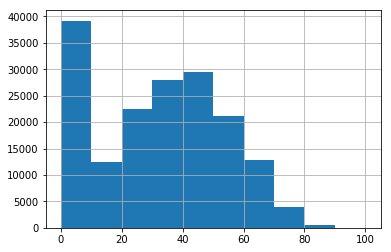

In [20]:
df["popularity"].hist()

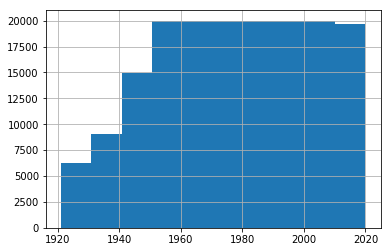

In [21]:
df["year"].hist()

In [22]:
songs2020 = df[df["year"] == 2020]

Finally some data I recognize

In [23]:
songs2020.sort_values("popularity", ascending = False).head(20)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87942,0.00146,['The Weeknd'],0.514,200040,0.730,0,0VjIjW4GlUZAMYd2vXMi3b,0.000095,1,0.0897,-5.934,1,Blinding Lights,100,2020-03-20,0.0598,171.005,0.334,2020
87940,0.24700,"['DaBaby', 'Roddy Ricch']",0.746,181733,0.690,1,7ytR5pFWmSjzHJIeQkgog4,0.000000,11,0.1010,-7.956,1,ROCKSTAR (feat. Roddy Ricch),99,2020-04-17,0.1640,89.977,0.497,2020
87949,0.73100,"['Powfu', 'beabadoobee']",0.726,173333,0.431,0,7eJMfftS33KTjuF7lTsMCx,0.000000,8,0.6960,-8.765,0,death bed (coffee for your head) (feat. beabad...,97,2020-02-08,0.1350,144.026,0.348,2020
87941,0.23300,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",0.716,165978,0.537,1,39Yp9wwQiSRIDOvrVg7mbk,0.000000,0,0.1570,-7.648,0,THE SCOTTS,96,2020-04-24,0.0514,129.979,0.280,2020
87946,0.32100,['Drake'],0.834,247059,0.454,1,127QTOFJsJQp5LbJbu3A1y,0.000006,1,0.1140,-9.750,0,Toosie Slide,95,2020-04-03,0.2010,81.618,0.837,2020
87943,0.74900,['StaySolidRocky'],0.728,147800,0.431,0,5RqR4ZCCKJDcBLIn4sih9l,0.000000,6,0.0996,-9.966,0,Party Girl,94,2020-04-21,0.0622,130.022,0.629,2020
87951,0.02640,['6ix9ine'],0.611,132303,0.688,1,4NhDYoQTYCdWHTvlbGVgwo,0.000000,1,0.2510,-5.688,1,GOOBA,94,2020-05-08,0.3410,178.462,0.393,2020
87952,0.02100,"['Lady Gaga', 'Ariana Grande']",0.672,182200,0.855,0,24ySl2hOPGCDcxBxFIqWBu,0.000000,9,0.3230,-3.764,1,Rain On Me (with Ariana Grande),94,2020-05-22,0.0397,123.056,0.646,2020
87953,0.22300,"['Ariana Grande', 'Justin Bieber']",0.597,228482,0.450,0,4HBZA5flZLE435QTztThqH,0.000000,8,0.3820,-6.658,1,Stuck with U (with Justin Bieber),94,2020-05-08,0.0418,178.765,0.537,2020
87944,0.01700,['Jack Harlow'],0.923,139741,0.604,1,1jaTQ3nqY3oAAYyCTbIvnM,0.000000,11,0.2720,-6.671,0,WHATS POPPIN,92,2020-03-13,0.2450,145.062,0.826,2020


So it looks like the early songs is what is confounding the previous results 

In [24]:
df_artist[df_artist["artists"] == "The Beatles"]

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
23445,The Beatles,0.360356,0.521975,174307.869988,0.546827,0.051906,0.223001,-9.682696,0.053395,121.074746,0.61966,48.060753,0,1,823


Wonder how popularity is generated if the beatles only have a popularity of 48?

In [25]:
df.sort_values("popularity", ascending = False).head(20)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87942,0.00146,['The Weeknd'],0.514,200040,0.730,0,0VjIjW4GlUZAMYd2vXMi3b,0.000095,1,0.0897,-5.934,1,Blinding Lights,100,2020-03-20,0.0598,171.005,0.334,2020
87940,0.24700,"['DaBaby', 'Roddy Ricch']",0.746,181733,0.690,1,7ytR5pFWmSjzHJIeQkgog4,0.000000,11,0.1010,-7.956,1,ROCKSTAR (feat. Roddy Ricch),99,2020-04-17,0.1640,89.977,0.497,2020
87949,0.73100,"['Powfu', 'beabadoobee']",0.726,173333,0.431,0,7eJMfftS33KTjuF7lTsMCx,0.000000,8,0.6960,-8.765,0,death bed (coffee for your head) (feat. beabad...,97,2020-02-08,0.1350,144.026,0.348,2020
87941,0.23300,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",0.716,165978,0.537,1,39Yp9wwQiSRIDOvrVg7mbk,0.000000,0,0.1570,-7.648,0,THE SCOTTS,96,2020-04-24,0.0514,129.979,0.280,2020
87852,0.06860,"['Surf Mesa', 'Emilee']",0.674,176547,0.774,0,62aP9fBQKYKxi7PDXwcUAS,0.001880,11,0.3930,-7.567,0,ily (i love you baby) (feat. Emilee),95,2019-11-26,0.0892,112.050,0.330,2019
87946,0.32100,['Drake'],0.834,247059,0.454,1,127QTOFJsJQp5LbJbu3A1y,0.000006,1,0.1140,-9.750,0,Toosie Slide,95,2020-04-03,0.2010,81.618,0.837,2020
87840,0.10400,['Roddy Ricch'],0.896,196653,0.586,1,0nbXyq5TXYPCO7pr3N8S4I,0.000000,10,0.7900,-6.687,0,The Box,95,2019-12-06,0.0559,116.971,0.642,2019
87844,0.30500,"['BENEE', 'Gus Dapperton']",0.863,223480,0.631,1,4nK5YrxbMGZstTLbvj6Gxw,0.000030,7,0.1230,-4.689,1,Supalonely,95,2019-11-15,0.0534,128.977,0.817,2019
87943,0.74900,['StaySolidRocky'],0.728,147800,0.431,0,5RqR4ZCCKJDcBLIn4sih9l,0.000000,6,0.0996,-9.966,0,Party Girl,94,2020-04-21,0.0622,130.022,0.629,2020
87951,0.02640,['6ix9ine'],0.611,132303,0.688,1,4NhDYoQTYCdWHTvlbGVgwo,0.000000,1,0.2510,-5.688,1,GOOBA,94,2020-05-08,0.3410,178.462,0.393,2020


What's good with aphex twin

In [26]:
df_artist[df_artist["artists"] == "Aphex Twin"]


,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
1440,Aphex Twin,0.557027,0.518824,332770.382353,0.482579,0.839709,0.135026,-16.752824,0.068538,120.465412,0.313238,45.352941,10,0,68


In [27]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


#### Trying to query certain artists in df

In [28]:
#errors out if you run it twice
type(df["artists"][0])
df["artists"] = df["artists"].apply(lambda x: x.replace("'", "").strip('][').split(', '))


In [29]:
def query_artist(artist):
    return [True if df["artists"][i] == [artist] else False for i in range(len(df["artists"]))]

In [30]:
df["artists"][0] == ['Carl Woitschach']
#Still having trouble picking specifc artist in this dset
#df[df["artists"] == ['Carl Woitschach']]
df[query_artist("The Beatles")]
#df.iloc[4]["artists"]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
2755,0.66700,[The Beatles],0.901,175547,0.5480,0,2ac3duEVpfrlgx4FGoPvxA,0.837000,0,0.1610,-6.808,1,Penny Lane - Take 6 / Instrumental,29,1967-05-26,0.0996,120.775,0.135,1967
2756,0.92200,[The Beatles],0.508,281493,0.3110,0,3FplMj2gYs4cymgvLvl8sO,0.000087,4,0.1250,-12.204,0,A Day In The Life - Take 1,29,1967-05-26,0.0403,84.655,0.200,1967
2798,0.03620,[The Beatles],0.590,165613,0.4480,0,1gJy93yw33uBxRHZn8KFEz,0.000000,3,0.1040,-11.901,1,Lovely Rita,27,1967-05-26,0.0256,86.656,0.680,1967
2841,0.35200,[The Beatles],0.597,156720,0.6600,0,33M8Tg2vvZYsmJIuGa3zZd,0.009130,0,0.6930,-9.499,1,Sgt. Pepper's Lonely Hearts Club Band - Take 9...,29,1967-05-26,0.0771,95.664,0.556,1967
2844,0.29400,[The Beatles],0.705,165160,0.4270,0,4CEoeG1rCKomLu9DtRvX5l,0.000000,4,0.3550,-11.971,1,With A Little Help From My Friends,27,1967-05-26,0.0353,112.294,0.827,1967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164588,0.93100,[The Beatles],0.442,229147,0.0782,0,1w344nykRKrqN2JsMIUlvR,0.895000,4,0.1080,-16.256,1,She's Leaving Home - Take 1 / Instrumental,29,1967-05-26,0.0374,128.584,0.198,1967
166656,0.00561,[The Beatles],0.656,179853,0.8650,0,6r7JAngkBzKGDKRUzLgY2U,0.000104,4,0.0853,-8.241,1,The Ballad Of John And Yoko - Remastered 2009,37,1988-03-07,0.0311,135.183,0.938,1988
166665,0.31100,[The Beatles],0.571,139680,0.7880,0,1Q7gCIpOjIIU0bUKcGzrG4,0.000004,7,0.2870,-8.159,1,I Feel Fine - Remastered 2009,37,1988-03-07,0.0447,90.138,0.769,1988
166683,0.44900,[The Beatles],0.553,123600,0.7100,0,3k6zSunlStXxWF0s1063lk,0.000001,2,0.0989,-10.492,1,Thank You Girl - Remastered 2009,38,1988-03-07,0.0314,137.717,0.972,1988


#### What's good with songs I like

In [31]:
#df[df["name"] == "Fingerbib"]
plotting_cols = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "valence", "speechiness"]
df[df["name"] == "Fingerbib"].iloc[0][plotting_cols]

acousticness         0.872
danceability         0.619
energy               0.564
instrumentalness     0.926
liveness              0.16
valence              0.787
speechiness         0.0293
Name: 133116, dtype: object

In [80]:
def plot_song(song):
    song_df = df[df["name"] == song]
    song_df.iloc[0][plotting_cols].plot.bar()
    plt.xticks(rotation= 45)
    plt.title("Technical Values of " + song)
    plt.xlabel("Musical Features measured from 0-1")
    plt.ylabel("Value")
# def plot_artist(artist):
#     artist_df = df_artist[query_artist(artist)]
#     artist_df.iloc[0][plotting_cols].plot.bar()
#     plt.xticks(rotation= 45)
#     plt.title("Technical Values of " + song)
#     plt.xlabel("Musical Features measured from 0-1")
#     plt.ylabel("Value")

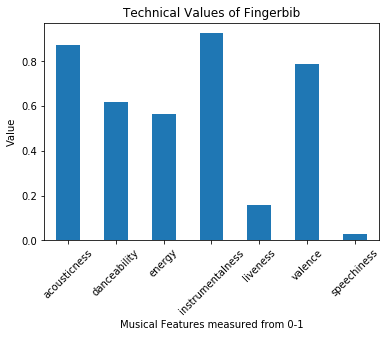

In [75]:
plot_song("Fingerbib")

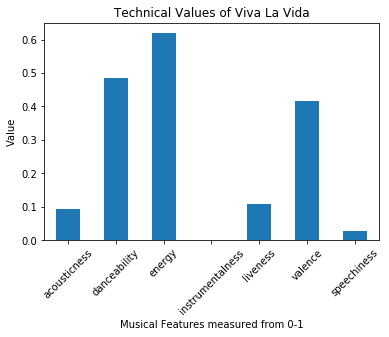

In [76]:
plot_song("Viva La Vida")

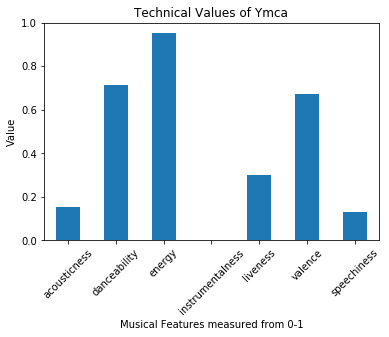

In [77]:
plot_song("Ymca")

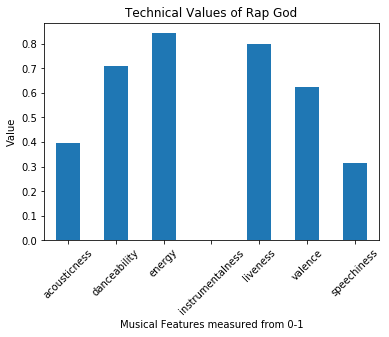

In [78]:
plot_song("Rap God")

In [82]:
#plot_artist("Mount Kimbie")

In [83]:
df[df["name"] == "money machine"]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
16108,0.229,"[100 gecs, Laura Les, Dylan Brady]",0.68,114460,0.659,1,61bwFjzXGG1x2aZsANdLyl,0.0,6,0.474,-7.186,1,money machine,65,2019-05-31,0.151,98.877,0.75,2019


## Modeling

Split data up into train and test

In [84]:
df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

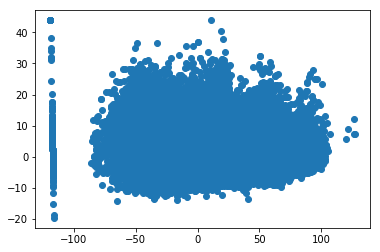

In [94]:
X = df[['acousticness', 
       'danceability',
       'energy',
       'danceability', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo']]

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
plt.scatter([i[0] for i in X_2d], [i[1] for i in X_2d])


In two dimensions data is one giant blob with a left line

Using this list of genres via https://examples.yourdictionary.com/major-types-of-music-from-around-the-world.html as "Top Music Genres In the World" : Classical, Country, Electronic dance music (EDM), Hip-hop ,Indie rock ,Jazz, K-pop, Metal, Oldies, Pop, Rap, Rhythm & blues (R&B), Rock

In [153]:
def plot_pca():
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(10, 10))
         
        plt.scatter([i[0] for i in X_2d], [i[1] for i in X_2d], c = 'r')

        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        #plt.legend()
        plt.title("Principal Components 1 and 2")
        plt.tight_layout()
        


In [154]:
def plot_kmeans():
    plt.plot(centers_2d[:,0], centers_2d[:,1], 'bo', label  = "centroid")

    for ind,i in zip(kmeans.labels_,centers_2d):
        #print(ind)
        
       
        print(np.where(kmeans.labels_==ind)[0])
        class_inds=np.where(kmeans.labels_==ind)[0]
        X_class = X_2d[class_inds]

        dists = metrics.pairwise_distances([i], X_class)

        max_dist=np.max(dists)
        print(max_dist)
        plt.gca().add_artist(plt.Circle(i, max_dist, fill=False))

I need to fix these models to actually take inputs so that they can be applied elsewhere

In [155]:
#Using 13 because that's the number of top genres described above
kmeans = KMeans(n_clusters= 13)
kmeans.fit(X)
centers = kmeans.cluster_centers_
centers_2d = pca.transform(centers)


[     0      8     17 ... 169885 169892 169893]
32.32955768766779
[     1      9     11 ... 169577 169607 169717]
29.41386140355619
[     2      3     19 ... 169880 169883 169896]
32.77269678201242
[     2      3     19 ... 169880 169883 169896]
99.06023270552144
[     4      5     16 ... 169699 169796 169863]
46.045108619332986
[     4      5     16 ... 169699 169796 169863]
91.01489936715707
[     6     14     18 ... 169890 169902 169908]
24.619346670274904
[     7     35     48 ... 169905 169906 169907]
52.7834735311997
[     0      8     17 ... 169885 169892 169893]
18.302218338007034
[     1      9     11 ... 169577 169607 169717]
63.860914603721035
[    10     39    112 ... 169891 169894 169895]
59.69199307840573
[     1      9     11 ... 169577 169607 169717]
98.56528113579999
[     1      9     11 ... 169577 169607 169717]
87.87773515199328


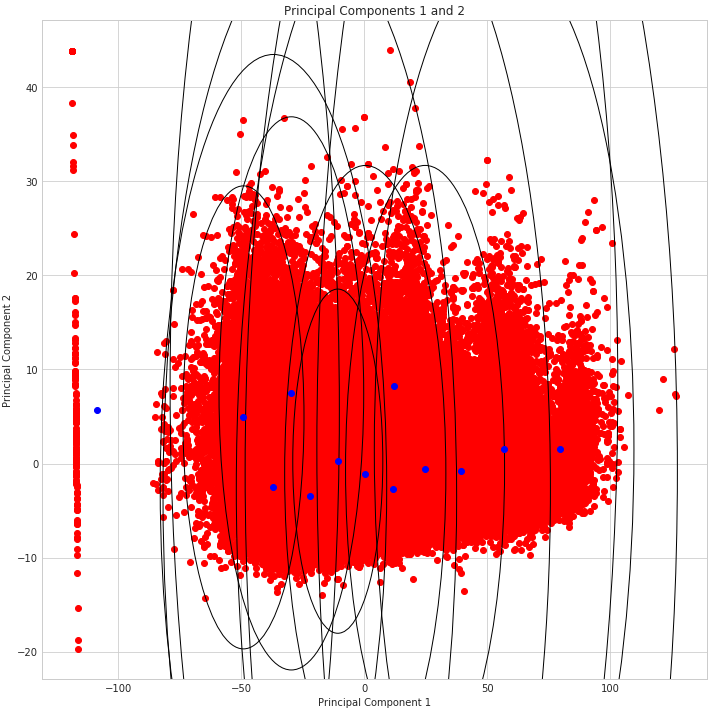

In [156]:
plot_pca()
plot_kmeans()

Visualizing our clusters in 2d space will be pretty tough if this is all correct. You can't really tell the difference between . I think this is mostly attributed to the fact that this data does not work well in a 2-dimensional space. If the data is doomed for dimension reduction then how do we visualize our clusters and try to discern genre?

What if I up the number of clusters?

[     0      8     24 ... 169811 169861 169906]
21.62051215512042
[     1     11     13 ... 169564 169577 169607]
42.93635087724073
[     2      3     55 ... 169549 169560 169646]
103.72045830720643
[     2      3     55 ... 169549 169560 169646]
17.496821842251258
[     4      5     16 ... 169699 169785 169863]
110.39811687413827
[     4      5     16 ... 169699 169785 169863]
14.016149376916177
[     6      9     18 ... 168638 169460 169520]
10.529860009547425
[     7     21     30 ... 169892 169893 169900]
16.467590370471036
[     0      8     24 ... 169811 169861 169906]
125.27352654297154
[     6      9     18 ... 168638 169460 169520]
106.85861939742178
[    10    123    210 ... 169710 169788 169791]
27.655454124900384
[     1     11     13 ... 169564 169577 169607]
45.108961268882894
[    12     22     31 ... 169551 169579 169717]
44.59967522256395
[     1     11     13 ... 169564 169577 169607]
29.2893781810372
[    14     38     45 ... 169295 169565 169675]
50.572060816769934


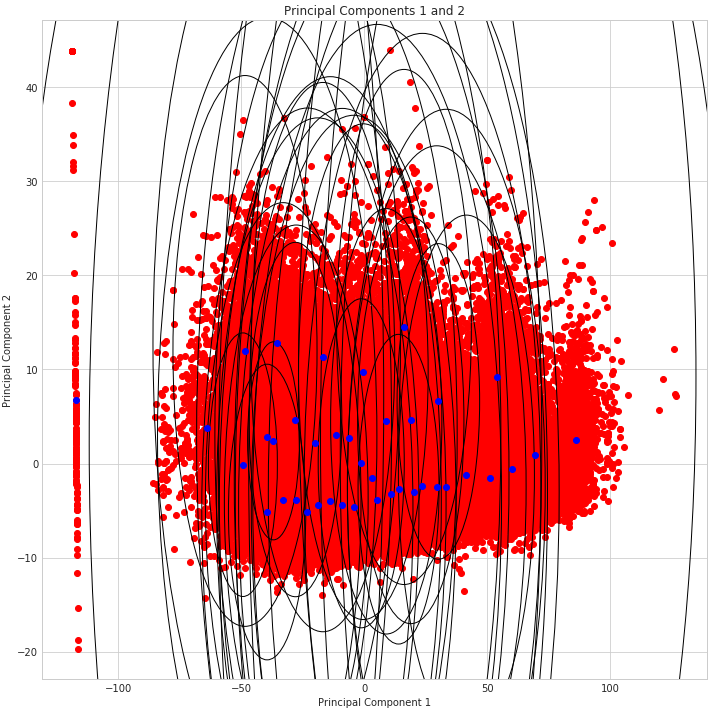

In [159]:
kmeans = KMeans(n_clusters= 40)
kmeans.fit(X)
centers = kmeans.cluster_centers_
centers_2d = pca.transform(centers)

plot_pca()
plot_kmeans()

Adding clusters doesn't do much, still getting massive circles.  Is my distance calculation correct? Also would be worth comparing circle functions to other people.

In [130]:
centers_2d

array([[  41.04344069,   -1.6531978 ],
       [  -9.71797335,    4.3185309 ],
       [ -19.96854477,    2.11239515],
       [  14.91701431,   -2.95857197],
       [ -65.60412183,    3.95460042],
       [  86.03705464,    2.5240779 ],
       [  50.64827508,   -1.85739833],
       [ -48.62062795,   13.27887342],
       [ -11.4444415 ,   -3.64127295],
       [  32.16468859,   -2.95571269],
       [   9.17102276,    4.57649453],
       [  59.00532301,   -1.68487821],
       [ -14.94150136,   -3.42614565],
       [ -36.12481298,   -3.63529488],
       [-117.31615753,    6.78327558],
       [ -18.59677675,   10.70250305],
       [  -3.19731441,   -3.5978897 ],
       [  18.77510551,    4.39159516],
       [ -39.42654328,    4.40509633],
       [ -23.90564686,   -4.25696532],
       [  50.04644947,    8.06125522],
       [  60.51660979,    7.52733813],
       [  11.89014622,   -3.0306037 ],
       [  -0.12043286,    2.93364368],
       [  16.98534961,   14.39423134],
       [   3.19535663,   

[-29.52473929   7.46981584]
156.47777642816862
[26.08046194 -0.72587964]
151.6078968507373
[-36.85926699  -2.53798815]
164.10047089149856
[-10.50108387   0.19033916]
137.63182683886876
[81.0504573   1.64983904]
204.27802144064913
[-22.02386396  -3.46849565]
149.35723139821775
[12.91990127  8.11899129]
136.50362845186652
[57.91959028  1.5620091 ]
181.73080011758557
[-49.06343355   4.91075923]
176.0309340637562
[ 0.85959444 -0.9823145 ]
127.81029919021887
[12.57046784 -2.71360215]
139.40553646212433
[-108.64280189    5.66411155]
235.60050615625437
[41.54954924 -0.61243056]
166.4235003091986


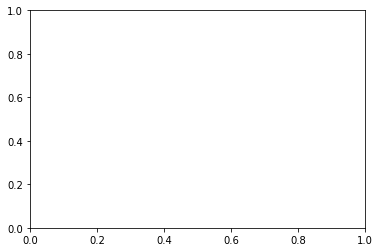

In [120]:
for ind,i in enumerate(centers_2d):
        #print(ind)
        
       
    print(i)
    
        
    dists = metrics.pairwise_distances([i], X_2d)

    max_dist=np.max(dists)
    print(max_dist)
    plt.gca().add_artist(plt.Circle(i, max_dist, fill=False))